<a href="https://colab.research.google.com/github/MiksterBerlin/Car_prices/blob/This%26That/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](images/kurt.jpeg)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

Background:
The demand for used cars is constantly increasing. With the higher demand the industry is growing. Understanding important factors that influence the pricing of these vehicles is essential for buyers, dealerships and financial institutions. Especially, age, mileage, and brand are commonly used to determine the price.
Problem:
Incorrect pricing tools lead to loss in revenue, weaking the market and make it unpredictable. Revenue maximization often involves finding the optimal price point that balances quantity sold and price, achieved by increasing or decreasing the market prices to sell more vehicles.

Goal:
Having better models that can easily gage the sales value of a specific vehicle helps with several things.

1. Informed estimates strengthen confidence during negotiation for byer and seller.
2. Helps dealers price inventory competitively based on demand and depreciation trends.
3. Automated Pricing on sites like CarMax, and Kelley Blue Book to suggest real-time prices.
4. Banks use predicted car values to assess loan amounts and risks.

Objectives:

Data Exploration:
Evaluate the dataset for qality issues and gain inside in the structure, extend and stratefication of the collected data.
Cleaning the data prepares the data set for modeling.
Model Building:
Train models and decide on the best one.
Evaluation & Tuning:
Assess the performance and fine tune the model.
Interpretation :
Extract actionable insights from the analysis to inform stakeholders about the results of the analysis and provide guidance for the implementation.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
import itertools
import warnings
#Regression Models
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

import seaborn as sns

vehicles = pd.read_csv('/content/drive/MyDrive/vehicles.csv')

vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
#evaluate the data set for incompleteness

vehicles.isnull().sum().sort_values()


,0
id,0
region,0
price,0
state,0
year,1205
transmission,2556
fuel,3013
odometer,4400
model,5277
title_status,8242


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [10]:
#drop variables that have highest percentage of missing values or are irrelevant (VIN)
vehicle_zero = vehicles.drop(['size', 'VIN'], axis=1)



#only keep vehicles that have prices that make sense and make ID the index
vehicles_zero = vehicles.loc[(vehicles['price']!=0) & (vehicles['price']!=1)].set_index('id')

#drop lines with Null values in dataset
vehicles_zero.dropna(inplace=True)

vehicles_zero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31813 entries, 7316482063 to 7302338378
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        31813 non-null  object 
 1   price         31813 non-null  int64  
 2   year          31813 non-null  float64
 3   manufacturer  31813 non-null  object 
 4   model         31813 non-null  object 
 5   condition     31813 non-null  object 
 6   cylinders     31813 non-null  object 
 7   fuel          31813 non-null  object 
 8   odometer      31813 non-null  float64
 9   title_status  31813 non-null  object 
 10  transmission  31813 non-null  object 
 11  VIN           31813 non-null  object 
 12  drive         31813 non-null  object 
 13  size          31813 non-null  object 
 14  type          31813 non-null  object 
 15  paint_color   31813 non-null  object 
 16  state         31813 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage: 4.4+ MB


In [14]:
# Convert the 'year' , 'odometer' column to integers.
vehicles_zero['year'] = vehicles_zero['year'].astype(int)
vehicles_zero['odometer'] = vehicles_zero['odometer'].astype(int)
# Display the first ten rows to verify the change.
vehicles_zero.head(10)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
id,,,,,,,,,,,,,,,,,
7316482063,birmingham,4000,2002,toyota,echo,excellent,4 cylinders,gas,155000,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
7316429417,birmingham,2500,1995,bmw,525i,fair,6 cylinders,gas,110661,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al
7315946365,birmingham,9000,2008,mazda,miata mx-5,excellent,4 cylinders,gas,56700,clean,automatic,JM1NC25F570128735,rwd,compact,convertible,white,al
7315354216,birmingham,8950,2011,ford,f-150,excellent,6 cylinders,gas,164000,clean,automatic,1FTMF1CM6BKD55331,fwd,full-size,truck,white,al
7315349921,birmingham,4000,1972,mercedes-benz,benz,fair,6 cylinders,gas,88100,clean,automatic,1.14023E+13,rwd,full-size,coupe,silver,al
7315259946,birmingham,98900,2001,ferrari,360 modena,good,8 cylinders,gas,20187,clean,automatic,ZFFYT53A110125703,rwd,mid-size,convertible,red,al
7315110575,birmingham,9400,2008,mercedes-benz,benz c350,good,6 cylinders,gas,129473,clean,automatic,WDDGF56X68F140907,rwd,full-size,sedan,silver,al
7314967754,birmingham,7300,2007,lexus,rx350,good,6 cylinders,gas,181000,clean,automatic,2T2GK31U57C025466,fwd,mid-size,SUV,white,al
7314956487,birmingham,72900,2021,chevrolet,tahoe,good,8 cylinders,gas,19129,clean,automatic,1GNSKPKD7MR102321,4wd,full-size,SUV,grey,al


In [15]:
vehicles_zero['Current Year'] = 2025

# Calculating the age of the vehicles using the current year as the reference point
vehicles_zero['age'] = vehicles_zero['Current Year'] - vehicles_zero['year']


# Removing the 'Current Year' column because it is not needed anymore
vehicles_zero.drop(['Current Year'], axis=1, inplace=True)

vehicles_zero.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,age
id,,,,,,,,,,,,,,,,,,
7316482063,birmingham,4000,2002,toyota,echo,excellent,4 cylinders,gas,155000,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al,23
7316429417,birmingham,2500,1995,bmw,525i,fair,6 cylinders,gas,110661,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al,30
7315946365,birmingham,9000,2008,mazda,miata mx-5,excellent,4 cylinders,gas,56700,clean,automatic,JM1NC25F570128735,rwd,compact,convertible,white,al,17
7315354216,birmingham,8950,2011,ford,f-150,excellent,6 cylinders,gas,164000,clean,automatic,1FTMF1CM6BKD55331,fwd,full-size,truck,white,al,14
7315349921,birmingham,4000,1972,mercedes-benz,benz,fair,6 cylinders,gas,88100,clean,automatic,1.14023E+13,rwd,full-size,coupe,silver,al,53


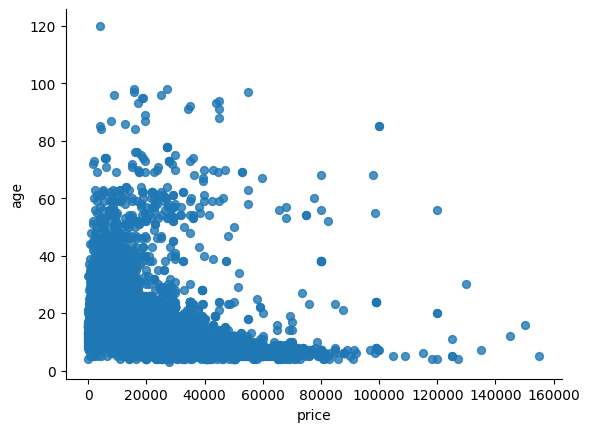

In [16]:
# Plot the Price for vehicles by the age of the vehicle

from matplotlib import pyplot as plt
vehicles_zero.plot(kind='scatter', x='price', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

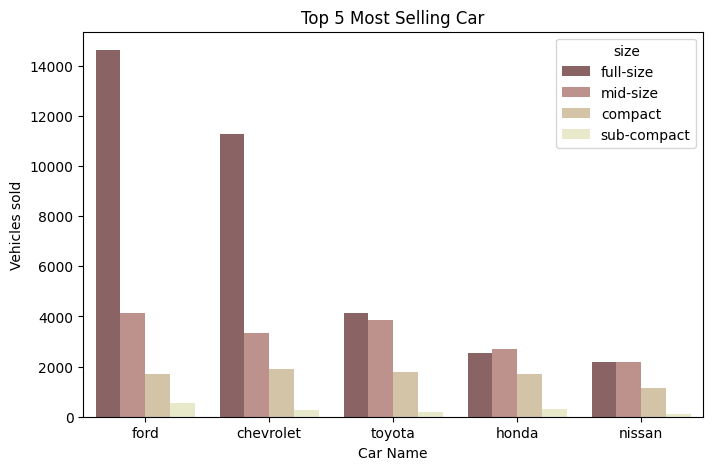

In [83]:
# Looking at sales per manufacturer and size

Top5 = vehicles_zero['manufacturer'].value_counts()[:5]

# Create a count plot
plt.figure(figsize=(8, 5))
sns.countplot(x='manufacturer', data= vehicles, order=Top5.index, hue='size', palette='pink')

# Set labels and title for the plot
plt.xlabel('Car Name')
plt.ylabel('Vehicles sold')
plt.title('Top 5 Most Selling Car')

# Display the plot
plt.show()

In [ ]:
# Plotting different relationships of price and categorical variables

plt.figure(figsize=(10, 8))

# Group the data by the 'Year' column and count the number of occurrences for each year
yearly_counts = vehicles_zero.groupby('year').count()['manufacturer']

# Create a bar plot to visualize the count of cars bought in each year
yearly_counts.plot(kind='bar')

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Set labels and title for the plot
plt.xlabel('Year of car')
plt.ylabel('# of Cars')
plt.title('Number of Cars by Year')


plt.figure(figsize=(70,40))
plt.xticks(rotation=45)
# Subplot 1: Barplot for Price vs. Fuel_Type
plt.subplot(4,3,1)
sns.barplot(data=vehicles_zero, x='fuel', y='price')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Fuel Type')


# Subplot 2: Barplot for Price vs. Condition
plt.subplot(4,3,2)
sns.barplot(data=vehicles_zero, x='condition', y='price')
plt.xlabel('condition')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. condition')


# Subplot 3: Barplot for Price vs. Transmission
plt.subplot(4,3,3)
sns.barplot(data=vehicles_zero, x='transmission', y='price')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Transmission Type')


# Subplot 4: Barplot for Price vs. Title Status
plt.subplot(4,3,4)
sns.barplot(data=vehicles_zero, x='title_status', y='price')
plt.xlabel('titel status')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. titel st')


# Subplot 5: Barplot for Price vs. Color
plt.subplot(4,3,5)
sns.barplot(data=vehicles_zero, x='paint_color', y='price')
plt.xlabel('paint')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. paint')
plt.xticks(rotation=45)
# Subplot 6: Barplot for Price vs. Type
plt.subplot(4,3,6)
sns.barplot(data=vehicles_zero, x='type', y='price')
plt.xlabel('type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. type')
plt.xticks(rotation=45)
# Subplot 7: Barplot for Price vs. Size
plt.subplot(4,3,7)
sns.barplot(data=vehicles_zero, x='size', y='price')
plt.xlabel('size')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. size')

# Subplot 8: Barplot for Price vs. Drive
plt.subplot(4,3,8)
sns.barplot(data=vehicles_zero, x='drive', y='price')
plt.xlabel('drive')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. drive')

# Subplot 9: Barplot for Price vs. Manufacturer
plt.subplot(4,3,9)
sns.barplot(data=vehicles_zero, x='manufacturer', y='price')
plt.xlabel('manuf')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. manufac')
plt.xticks(rotation=45)
# Subplot 10: Barplot for Price vs. Cylinders
plt.subplot(4,3,10)
sns.barplot(data=vehicles_zero, x='cylinders', y='price')
plt.xlabel('cylinders')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. cylinder')

# Subplot 11: Barplot for Price vs. Cylinders
plt.subplot(4,3,10)
sns.barplot(data=vehicles_zero, x='VIN', y='price')
plt.xlabel('cylinders')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. cylinder')


# Display the plot
plt.show()

In [25]:
# drop specified columns that have low variance or are irrelevant
vehicles_x = vehicles_zero.drop(['state', 'region', 'VIN', 'model', 'transmission', 'year'], axis=1)
print(vehicles_x.head())


            price   manufacturer  condition    cylinders fuel  odometer  \
id                                                                        
7316482063   4000         toyota  excellent  4 cylinders  gas    155000   
7316429417   2500            bmw       fair  6 cylinders  gas    110661   
7315946365   9000          mazda  excellent  4 cylinders  gas     56700   
7315354216   8950           ford  excellent  6 cylinders  gas    164000   
7315349921   4000  mercedes-benz       fair  6 cylinders  gas     88100   

           title_status drive       size         type paint_color  age  
id                                                                      
7316482063        clean   fwd    compact        sedan        blue   23  
7316429417        clean   rwd   mid-size        sedan       white   30  
7315946365        clean   rwd    compact  convertible       white   17  
7315354216        clean   fwd  full-size        truck       white   14  
7315349921        clean   rwd  full-

            price  odometer  age  manufacturer_acura  manufacturer_alfa-romeo  \
id                                                                              
7316482063   4000    155000   23               False                    False   
7316429417   2500    110661   30               False                    False   
7315946365   9000     56700   17               False                    False   
7315354216   8950    164000   14               False                    False   
7315349921   4000     88100   53               False                    False   

            manufacturer_aston-martin  manufacturer_audi  manufacturer_bmw  \
id                                                                           
7316482063                      False              False             False   
7316429417                      False              False              True   
7315946365                      False              False             False   
7315354216                      False     

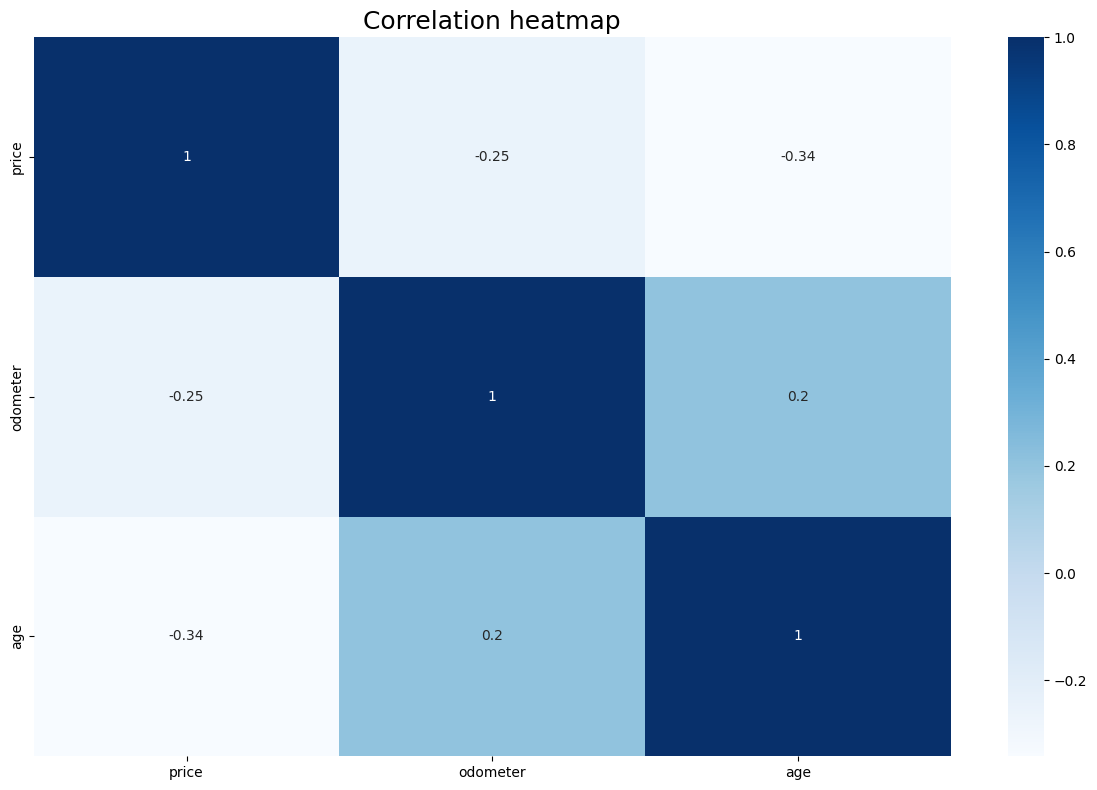

In [26]:
#transform cathegorical variable for analysis

vehicles_dum = pd.get_dummies(vehicles_x)

print(vehicles_dum.head())

vehicles_dum.info()

# plot correlation matrix for continuous variables
num_col = ['price', 'odometer', 'age']
plt.figure(figsize=(12,8))
sns.heatmap(vehicles_dum[num_col].corr(method='pearson'), annot=True, cmap='Blues')
plt.title('Correlation heatmap', fontsize=18)
plt.tight_layout()
plt.show()

In [27]:
# display list of features that are not price (dependent variable)

features = [i for i in vehicles_dum.columns if i not in ['price']]
features

['odometer',
 'age',
 'manufacturer_acura',
 'manufacturer_alfa-romeo',
 'manufacturer_aston-martin',
 'manufacturer_audi',
 'manufacturer_bmw',
 'manufacturer_buick',
 'manufacturer_cadillac',
 'manufacturer_chevrolet',
 'manufacturer_chrysler',
 'manufacturer_datsun',
 'manufacturer_dodge',
 'manufacturer_ferrari',
 'manufacturer_fiat',
 'manufacturer_ford',
 'manufacturer_gmc',
 'manufacturer_harley-davidson',
 'manufacturer_honda',
 'manufacturer_hyundai',
 'manufacturer_infiniti',
 'manufacturer_jaguar',
 'manufacturer_jeep',
 'manufacturer_kia',
 'manufacturer_land rover',
 'manufacturer_lexus',
 'manufacturer_lincoln',
 'manufacturer_mazda',
 'manufacturer_mercedes-benz',
 'manufacturer_mercury',
 'manufacturer_mini',
 'manufacturer_mitsubishi',
 'manufacturer_nissan',
 'manufacturer_pontiac',
 'manufacturer_porsche',
 'manufacturer_ram',
 'manufacturer_rover',
 'manufacturer_saturn',
 'manufacturer_subaru',
 'manufacturer_tesla',
 'manufacturer_toyota',
 'manufacturer_volkswage

In [28]:
# look at the variance inflation factors

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [29]:
continuous_variables = ['price', 'odometer', 'age']

In [30]:
# create data frame for continuous variables
continuous_feature_df = pd.DataFrame(vehicles_dum[continuous_variables])

In [32]:
continuous_feature_df

,price,odometer,age
id,,,
7316482063,4000,155000,23
7316429417,2500,110661,30
7315946365,9000,56700,17
7315354216,8950,164000,14
7315349921,4000,88100,53
...,...,...,...
7303314912,23495,146795,10
7303227528,12995,61127,9
7303114896,32999,154642,11


In [33]:
# making sure there is no multicollinearity between variables
continuous_feature_df.corr()
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

continuous_variables_filtered = [i for i in continuous_feature_df if i in vehicles_dum.columns]
data_for_vif = vehicles_dum[continuous_variables_filtered]
vif_results = calc_vif(data_for_vif)

print(vif_results)
#all values below 5, no multicollinearity of any concern

  variables       VIF
0     price  1.615121
1  odometer  2.044981
2       age  2.533650


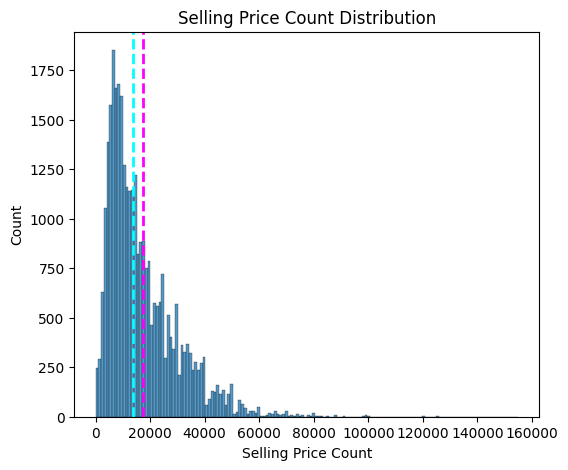

In [35]:
# Transform the data
# Visualizing the distribution of the price (dependent)- Median and Mean. Check for distribution.
plt.figure(figsize=(6,5))
sns.histplot(vehicles_dum['price'])
plt.xlabel('Selling Price Count')
plt.title('Selling Price Count Distribution')
plt.axvline(vehicles_dum[['price'][0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(vehicles_dum[['price'][0]].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [36]:
vehicles_dum['price'].skew()

np.float64(1.7407555419946963)

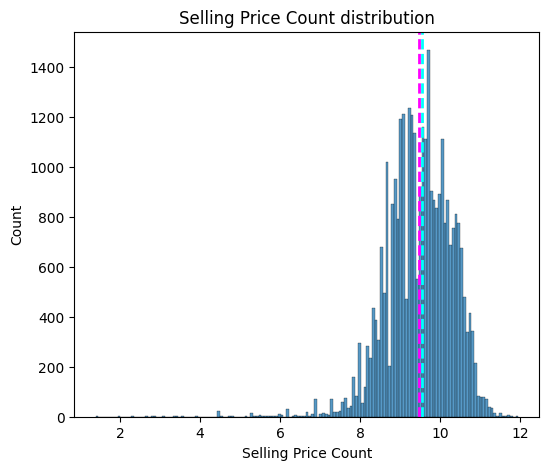

In [38]:
# Plot log scale distribution of price

plt.figure(figsize=(6,5))
sns.histplot(np.log1p(vehicles_dum['price']))
plt.xlabel('Selling Price Count')
plt.title('Selling Price Count distribution')
plt.axvline(np.log1p(vehicles_dum['price']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.log1p(vehicles_dum['price']).median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [39]:
#Use standartscaler for Standardization of the dataset

from sklearn.preprocessing import StandardScaler
features = [i for i in vehicles_dum.columns if i not in ['price']]
scaler = StandardScaler()
X = scaler.fit_transform(vehicles_dum[features])
y = vehicles_dum['price']

In [40]:
X


array([[ 0.43544558,  1.20932821, -0.08589579, ..., -0.39788262,
        -0.62100239, -0.08248775],
       [ 0.0047881 ,  2.16757455, -0.08589579, ..., -0.39788262,
         1.61029975, -0.08248775],
       [-0.5193263 ,  0.38797421, -0.08589579, ..., -0.39788262,
         1.61029975, -0.08248775],
       ...,
       [ 0.43196839, -0.4333798 , -0.08589579, ..., -0.39788262,
        -0.62100239, -0.08248775],
       [-0.71586556, -0.98094913, -0.08589579, ..., -0.39788262,
        -0.62100239, -0.08248775],
       [-0.39451634,  1.89378988, -0.08589579, ..., -0.39788262,
         1.61029975, -0.08248775]])

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [41]:
#create test and train data sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train.value_counts()


,count
price,
9995,271
6995,261
7995,256
8995,227
10995,209
...,...
43001,1
34996,1
16650,1


In [44]:
# create a evaluation matrix for the different models that will be tested

def evaluate_model(model, y_test, y_pred):
    features = [i for i in vehicles_dum.columns if i not in ['price']]
    y_train_pred = model.predict(X_train)  # Predicting on the training data
    mse = mean_squared_error(y_test, y_pred) # calculated mean squarred error
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)# calulate mean absolute error
    r2_train = r2_score(y_train, y_train_pred)  # Corrected: using y_train for training R2
    r2 = r2_score(y_test, y_pred)
    r2_adjusted = 1 - (1 - r2) * ((len(X_test) - 1) / (len(X_test) - X_test.shape[1] - 1))

    # Printing Evaluation Matrix
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("Train R2:", r2_train)
    print("Test R2:", r2)
    print("Adjusted R2:", r2_adjusted)

    try:
        importance = model.feature_importances_
    except:
        importance = model.coef_
        importance = np.absolute(importance)
    if len(importance) == len(features):
        pass
    else:
        importance = importance[0]

    # Feature importances plotting
    feat = pd.Series(importance, index=features)
    plt.figure(figsize=(7, 4))
    plt.title('Feature Importances (top 5) for ' + str(model), fontsize=12)
    plt.xlabel('Relative Importance')
    feat.nlargest(5).plot(kind='barh')

    model_score = [mse, rmse, mae, r2_train, r2, r2_adjusted]
    return model_score


Text(0.5, 1.0, 'Actual and Predicted Selling Price')

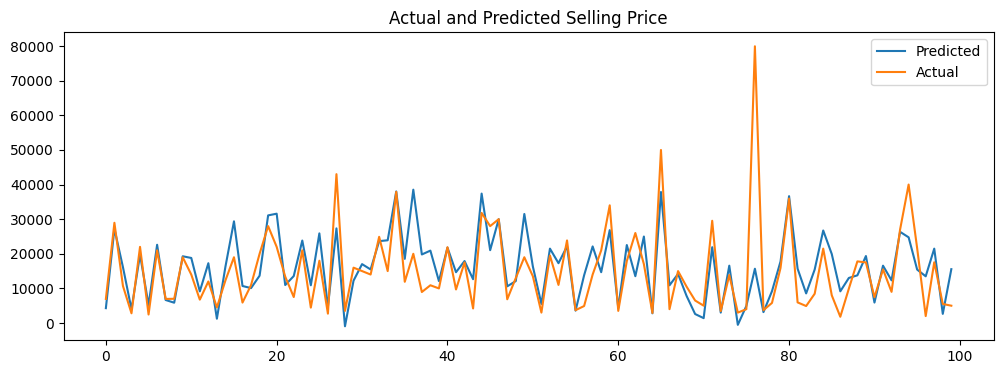

In [45]:
# Import the LinearRegression
regr = LinearRegression()

# Fit the linear regression model to the training data
regr.fit(X_train, y_train)

# Predict on the model
y_pred_LinR = regr.predict(X_test)

# Plotting the predictions overlayed to the actual data:
plt.figure(figsize=(12,4))
plt.plot((y_pred_LinR)[:100])  # Changed y_pred to y_pred_LinR to reflect Linear Regression
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Selling Price', fontsize=12)

MSE: 76742486.65115596
RMSE: 8760.278914004733
MAE: 5371.5831069561045
Train R2: 0.5789748322242013
Test R2: 0.5407429194926396
Adjusted R2: 0.5358794536395489


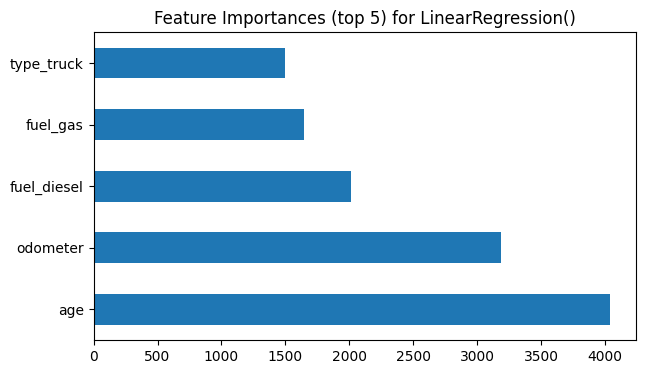

In [46]:
score = {}  # Initialize score as an empty dictionary
linear_score = evaluate_model(regr, y_test, y_pred_LinR)
score['Linear regression'] = linear_score

In [47]:
#Testing the efficiency of the Lasso model

lasso = Lasso()

# Fit the lasso regression model to the training data
lasso.fit(X_train, y_train)

# Predict on the model
y_pred_lasso1 = lasso.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.753e+10, tolerance: 3.882e+08
  model = cd_fast.enet_coordinate_descent(


MSE: 76737309.52377108
RMSE: 8759.983420290879
MAE: 5371.358437754226
Train R2: 0.5789743408987323
Test R2: 0.5407739014494664
Adjusted R2: 0.5359107636908036


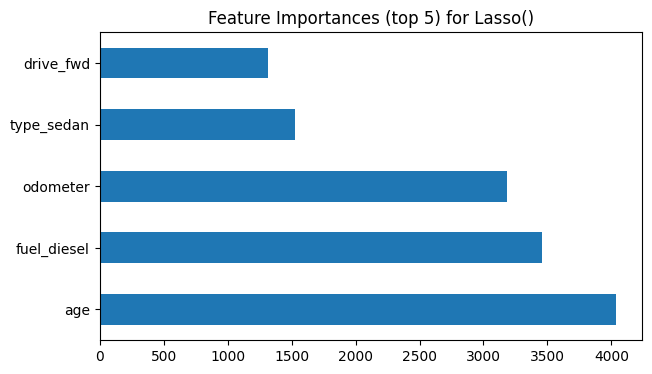

In [48]:
# Visualizing evaluation Score chart Lasso regression
lasso_score = evaluate_model(lasso, y_test,y_pred_lasso1)
score['Lasso regression'] = lasso_score

In [50]:
lasso = Lasso()

# Define the parameters to be optimized & Perform grid search
lasso = Lasso()

# Define the parameters to be optimized & Perform grid search
parameters = {'alpha': [1e-2,1,5,10,20,30,40,45,50,55,60,100, 200, 300]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

# Fitting model
lasso_regressor.fit(X_train,y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.630e+10, tolerance: 3.089e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.450e+10, tolerance: 3.075e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.722e+10, tolerance: 3.107e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 200, 300]},
             scoring='neg_mean_squared_error')

In [52]:
print("The optimum alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)


The optimum alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -88276861.12043417


In [53]:
# Import the Lasso Regression class with best alpha
lasso = Lasso(alpha = lasso_regressor.best_params_['alpha'])

# Fit the lasso regression model to your training data
lasso.fit(X_train, y_train)

# Predict the model
y_pred_lassocv = lasso.predict(X_test)

MSE: 76805435.66914888
RMSE: 8763.87104361702
MAE: 5396.8386982954125
Train R2: 0.5752615099131846
Test R2: 0.5403662079279539
Adjusted R2: 0.5354987527540468


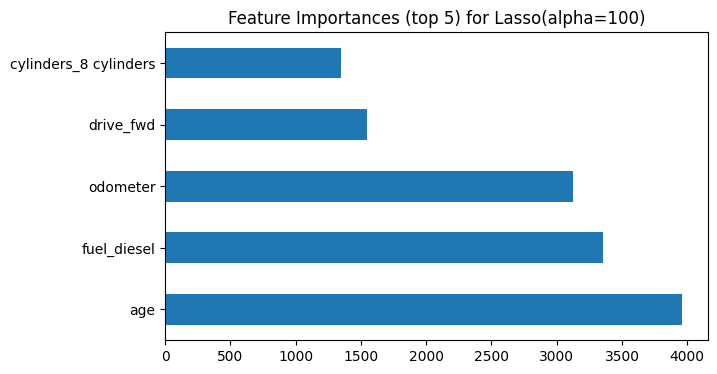

In [54]:
lasso2 = evaluate_model(lasso, y_test,y_pred_lassocv)

name = 'Lasso with alpha = ' + str(lasso_regressor.best_params_['alpha'])

score[name] = lasso2

Lasso Regression even when tuned is less precise compared to Linear Regression.

In [55]:
# Ridge regressor class
ridge = Ridge()

# Fit the ridge regression model to your training data
ridge.fit(X_train, y_train)

# Predict on the model
y_pred_ridge1 = ridge.predict(X_test)

MSE: 76741906.95373696
RMSE: 8760.245827243489
MAE: 5371.6243083093095
Train R2: 0.5789748316764245
Test R2: 0.5407463886289141
Adjusted R2: 0.5358829595134732


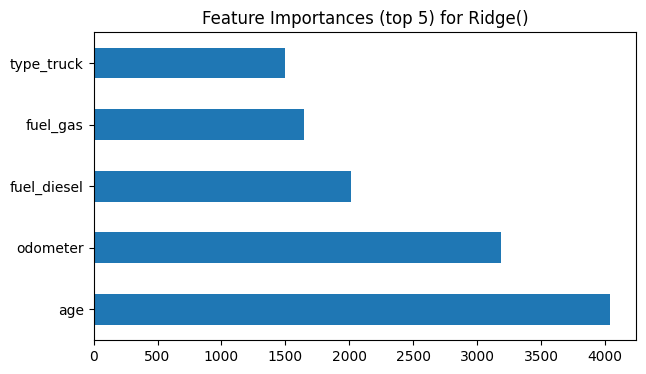

In [56]:
result = evaluate_model(ridge, y_test,y_pred_ridge1)
score['Ridge'] = result



In [57]:
# Import Ridge regressor Class
ridge = Ridge()

# Define the parameters to be optimized & Perform grid search
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

# Fitting model
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 200, 300]},
             scoring='neg_mean_squared_error')

In [58]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)


The best fit alpha value is found out to be : {'alpha': 300}

Using  {'alpha': 300}  the negative mean squared error is:  -87417129.98031273


In [59]:
# Import Decision Tree Regressor class
dt = DecisionTreeRegressor(random_state=1)

# Fit the Decision Tree model to your training data
dt.fit(X_train,y_train)

# Predict on the model
y_pred_dt1 = dt.predict(X_test)

MSE: 37724403.30769549
RMSE: 6142.019481220773
MAE: 2628.803773795009
Train R2: 0.9997485803474158
Test R2: 0.7742424036149802
Adjusted R2: 0.7718516634224035


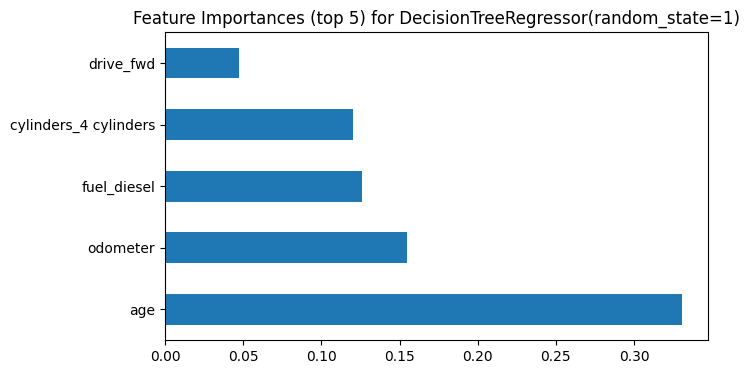

In [60]:
result = evaluate_model(dt, y_test,y_pred_dt1)
score['Decision tree'] = result

In [61]:
score

{'Linear regression': [76742486.65115596,
  np.float64(8760.278914004733),
  5371.5831069561045,
  0.5789748322242013,
  0.5407429194926396,
  0.5358794536395489],
 'Lasso regression': [76737309.52377108,
  np.float64(8759.983420290879),
  5371.358437754226,
  0.5789743408987323,
  0.5407739014494664,
  0.5359107636908036],
 'Lasso with alpha = 100': [76805435.66914888,
  np.float64(8763.87104361702),
  5396.8386982954125,
  0.5752615099131846,
  0.5403662079279539,
  0.5354987527540468],
 'Ridge': [76741906.95373696,
  np.float64(8760.245827243489),
  5371.6243083093095,
  0.5789748316764245,
  0.5407463886289141,
  0.5358829595134732],
 'Decision tree': [37724403.30769549,
  np.float64(6142.019481220773),
  2628.803773795009,
  0.9997485803474158,
  0.7742424036149802,
  0.7718516634224035]}

In [62]:
# Train a Random Forest model
RFR = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the Random Forest model to your training data
RFR.fit(X_train, y_train)

# Predict and evaluate
y_pred_RFR = RFR.predict(X_test)


MSE: 18659591.410750493
RMSE: 4319.674919568658
MAE: 2140.0058439213512
Train R2: 0.9828601815404222
Test R2: 0.8883337008127504
Adjusted R2: 0.8871511709050172


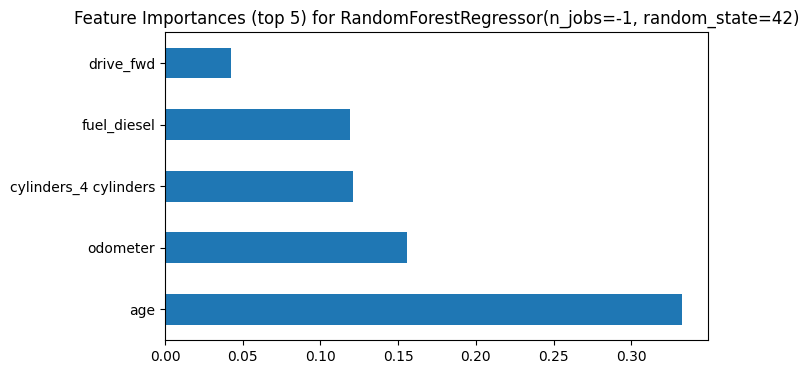

In [64]:
result = evaluate_model(RFR, y_test,y_pred_RFR)
score['Random Forest Regressor'] = result

In [73]:
#Define parameters
RFR_parameters = {
    'n_estimators': [100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

#perform grid search
RFR_regressor = GridSearchCV(RFR, RFR_parameters, scoring='neg_mean_squared_error', cv=5)


# Fitting model
RFR_regressor.fit(X_train,y_train)

KeyboardInterrupt: 

In [74]:
score

{'Linear regression': [76742486.65115596,
  np.float64(8760.278914004733),
  5371.5831069561045,
  0.5789748322242013,
  0.5407429194926396,
  0.5358794536395489],
 'Lasso regression': [76737309.52377108,
  np.float64(8759.983420290879),
  5371.358437754226,
  0.5789743408987323,
  0.5407739014494664,
  0.5359107636908036],
 'Lasso with alpha = 100': [76805435.66914888,
  np.float64(8763.87104361702),
  5396.8386982954125,
  0.5752615099131846,
  0.5403662079279539,
  0.5354987527540468],
 'Ridge': [76741906.95373696,
  np.float64(8760.245827243489),
  5371.6243083093095,
  0.5789748316764245,
  0.5407463886289141,
  0.5358829595134732],
 'Decision tree': [37724403.30769549,
  np.float64(6142.019481220773),
  2628.803773795009,
  0.9997485803474158,
  0.7742424036149802,
  0.7718516634224035],
 'Random Forest Regressor': [18659591.410750493,
  np.float64(4319.674919568658),
  2140.0058439213512,
  0.9828601815404222,
  0.8883337008127504,
  0.8871511709050172],
 'XGB Regressor': [23104

In [75]:
from xgboost import XGBRegressor


#define the model parameters
xgbr= XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=1)

#fit the model
xgbr.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgbr = xgbr.predict(X_test)


MSE: 23104278.0
RMSE: 4806.6909615659715
MAE: 2995.824951171875
Train R2: 0.8909860253334045
Test R2: 0.8617349863052368
Adjusted R2: 0.8602707798698375


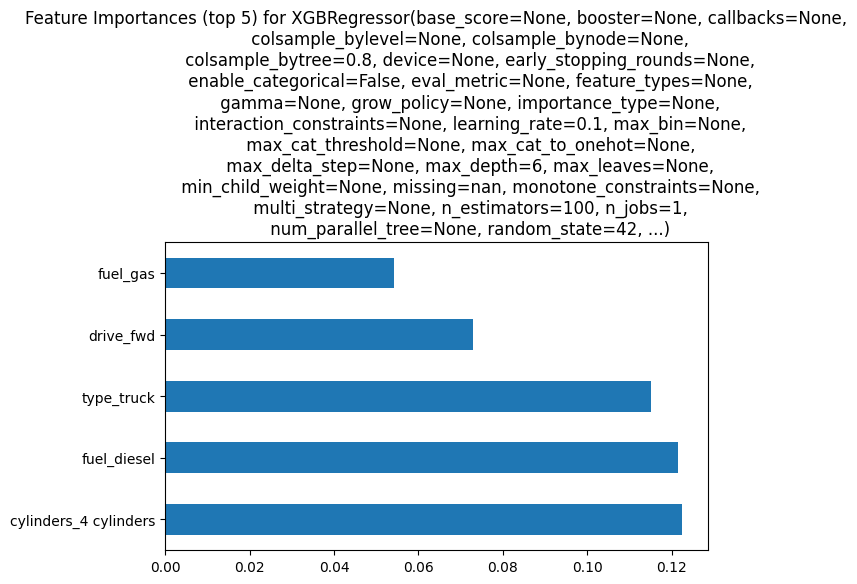

In [76]:
result = evaluate_model(xgbr, y_test,y_pred_xgbr)
score['XGB Regressor'] = result

In [77]:
score

{'Linear regression': [76742486.65115596,
  np.float64(8760.278914004733),
  5371.5831069561045,
  0.5789748322242013,
  0.5407429194926396,
  0.5358794536395489],
 'Lasso regression': [76737309.52377108,
  np.float64(8759.983420290879),
  5371.358437754226,
  0.5789743408987323,
  0.5407739014494664,
  0.5359107636908036],
 'Lasso with alpha = 100': [76805435.66914888,
  np.float64(8763.87104361702),
  5396.8386982954125,
  0.5752615099131846,
  0.5403662079279539,
  0.5354987527540468],
 'Ridge': [76741906.95373696,
  np.float64(8760.245827243489),
  5371.6243083093095,
  0.5789748316764245,
  0.5407463886289141,
  0.5358829595134732],
 'Decision tree': [37724403.30769549,
  np.float64(6142.019481220773),
  2628.803773795009,
  0.9997485803474158,
  0.7742424036149802,
  0.7718516634224035],
 'Random Forest Regressor': [18659591.410750493,
  np.float64(4319.674919568658),
  2140.0058439213512,
  0.9828601815404222,
  0.8883337008127504,
  0.8871511709050172],
 'XGB Regressor': [23104

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Of all models, the Random Forrest regressor model has the highest accuracy in determining the price of a used vehicle followed by the Decission tree model and XGB Regression model. This means the model explains about 89% of the variance in car prices.

Summary
Model: XGB Regressor Model
Training Data: One-hot encoded categorical features + scaled numerical features (year, age, odometer)
Performance on Test Set:
RMSE: 4288.6
R² Score: 0.89


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In summary, the age of the car is the main factor influencing a customers bying decission followed by odometer reading and high fuel efficiency (4-cylinder and/or diesel cars). Car dealerships should favor these cars for their inventory.